# Clustering US states using pandas and scikit-learn

On this notebook we'll use pandas to load and process data from the US states, after that we'll use scikit-learn to cluster states based on census statistics.

In [2]:
#First import pandas and KMeans from scikit-learn
import pandas as pd
from sklearn.cluster import KMeans

#Configure the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
#Load county data - this also contains state-level data

#The first file contains the actual statistics, but the columns have codes
county_facts = pd.read_csv('../kaggle-data/county_facts.csv', index_col=['fips', 'area_name'])
#The second file translates from codes to the meaning of each column
county_facts_columns = pd.read_csv('../kaggle-data/county_facts_dictionary.csv')

In [4]:
#Take a look at the columns
county_facts_columns

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [5]:
#Let's take a look at some of the rows we have using head() pandas method
county_facts.head()

,,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,area_name,,,,,,,,,,,,,,,,,,,,,
0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


## Data processing

`county_facts` contains data at the county and state level. Since we only want state-level data, we need to filter the rows. As you can see from the previous cell, county-level rows contain the `state_abbreviation`, the rest of the rows contain null. To get only state-level data we'll filter by rows that have a null value in `state_abbreviation` column but leave the first row out since it contains data for the entire country.

In [6]:
#Subselect rows, let's just keep state level data
df = county_facts[county_facts.state_abbreviation.isnull()][1:]
df.head()

,,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,area_name,,,,,,,,,,,,,,,,,,,,,
1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2000,Alaska,NaN,736732,710249,3.7,710231,7.4,25.3,9.4,47.4,66.9,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
4000,Arizona,NaN,6731484,6392310,5.3,6392017,6.4,24.1,15.9,50.3,83.7,...,10.7,28.1,57977827,57573459,86758801,13637,13268514,26997,113594.08,56.3
5000,Arkansas,NaN,2966369,2915958,1.7,2915918,6.5,23.8,15.7,50.9,79.7,...,2.3,24.5,60735582,29659789,32974282,11602,3559795,7666,52035.48,56.0
6000,California,NaN,38802500,37254503,4.2,37253956,6.5,23.6,12.9,50.3,73.2,...,16.5,30.3,491372092,598456486,455032270,12561,80852787,83645,155779.22,239.1


While we can cluster using all columns, let's subset them for now. Feel free to modify this piece of code and experiment with different column combinations!

In [7]:
#Select columns that have to do with etnicity proportion
df = df.filter(regex='RHI*')

The column names in our data are coded, since we are interested in the meaning of each column we are using, we need to replace the code for the actual meaning. The following cell achieves that.

In [8]:
#Rename columns to use their meaning instead their codename
col_names = dict((k, v) for k,v in county_facts_columns.itertuples(index=False, name=None))
df.rename(columns=col_names, inplace=True)
df.head()

,,"White alone, percent, 2014","Black or African American alone, percent, 2014","American Indian and Alaska Native alone, percent, 2014","Asian alone, percent, 2014","Native Hawaiian and Other Pacific Islander alone, percent, 2014","Two or More Races, percent, 2014","Hispanic or Latino, percent, 2014","White alone, not Hispanic or Latino, percent, 2014"
fips,area_name,,,,,,,,
1000,Alabama,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2
2000,Alaska,66.9,3.9,14.8,6.1,1.3,7.1,6.8,61.9
4000,Arizona,83.7,4.7,5.3,3.3,0.3,2.7,30.5,56.2
5000,Arkansas,79.7,15.6,1.0,1.5,0.3,1.9,7.0,73.4
6000,California,73.2,6.5,1.7,14.4,0.5,3.7,38.6,38.5


Now let's run a KMeans algorithm with 4 clusters, feel free to experiment with different [clustering algorithms](http://scikit-learn.org/stable/modules/clustering.html) and different parameters (parameter change depending on the algorithm).

In [9]:
#Run a clustering algorithm, group in 4 clusters
model = KMeans(n_clusters=4)
results = model.fit_predict(df.values)

In [10]:
#Assign cluster number to our dataframe, this will help us identify which cluster was assigned to
#every state
df['cluster'] = results

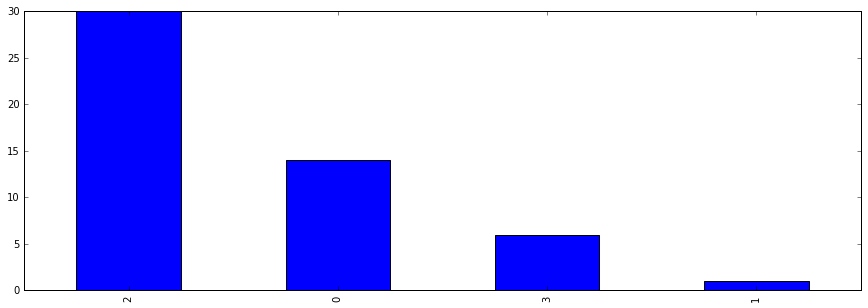

In [11]:
#Count the number of states assigned to each cluster
df.cluster.value_counts().plot.bar()

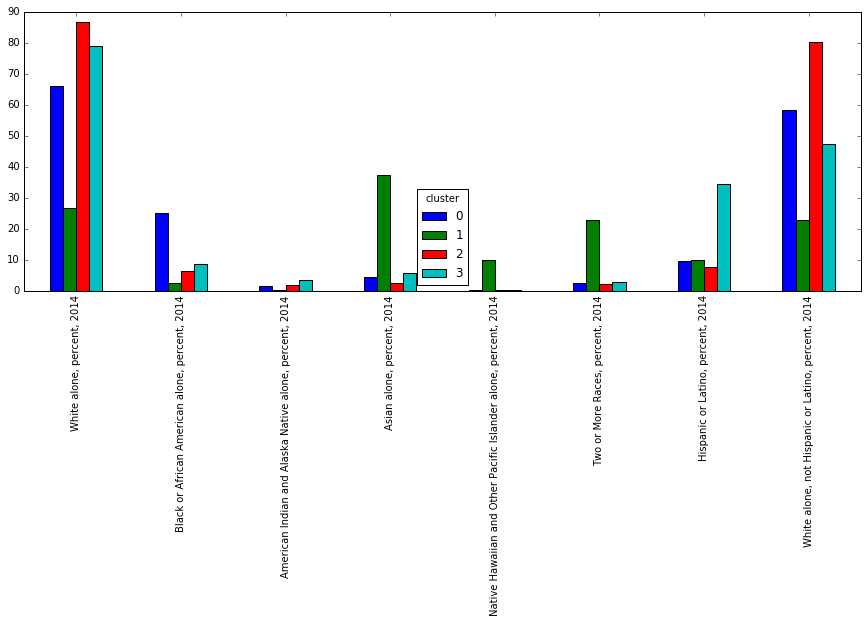

In [12]:
#Let's take a look at how the algorithm clustered states
df.groupby(df.cluster).mean().transpose().plot.bar()

We can se that cluster 0 has a much higher proportion of hispanics, cluster 3 of asians and clister 1 african americanas.

In [13]:
#Let's see which states are in each cluster
df[df.cluster==0]

,,"White alone, percent, 2014","Black or African American alone, percent, 2014","American Indian and Alaska Native alone, percent, 2014","Asian alone, percent, 2014","Native Hawaiian and Other Pacific Islander alone, percent, 2014","Two or More Races, percent, 2014","Hispanic or Latino, percent, 2014","White alone, not Hispanic or Latino, percent, 2014",cluster
fips,area_name,,,,,,,,,
1000,Alabama,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,0
2000,Alaska,66.9,3.9,14.8,6.1,1.3,7.1,6.8,61.9,0
10000,Delaware,70.8,22.2,0.7,3.8,0.1,2.5,8.9,63.7,0
11000,District Of Columbia,43.6,49.0,0.6,4.0,0.2,2.6,10.4,35.8,0
13000,Georgia,62.1,31.5,0.5,3.8,0.1,2.0,9.3,54.3,0
17000,Illinois,77.5,14.7,0.6,5.3,0.1,1.8,16.7,62.3,0
22000,Louisiana,63.4,32.5,0.8,1.8,0.1,1.5,4.8,59.3,0
24000,Maryland,60.1,30.3,0.6,6.4,0.1,2.6,9.3,52.6,0
28000,Mississippi,59.7,37.5,0.6,1.0,0.1,1.2,3.0,57.3,0


In [14]:
df[df.cluster==3]

,,"White alone, percent, 2014","Black or African American alone, percent, 2014","American Indian and Alaska Native alone, percent, 2014","Asian alone, percent, 2014","Native Hawaiian and Other Pacific Islander alone, percent, 2014","Two or More Races, percent, 2014","Hispanic or Latino, percent, 2014","White alone, not Hispanic or Latino, percent, 2014",cluster
fips,area_name,,,,,,,,,
4000,Arizona,83.7,4.7,5.3,3.3,0.3,2.7,30.5,56.2,3
6000,California,73.2,6.5,1.7,14.4,0.5,3.7,38.6,38.5,3
12000,Florida,77.8,16.8,0.5,2.8,0.1,2.0,24.1,55.8,3
32000,Nevada,76.2,9.1,1.6,8.3,0.7,4.0,27.8,51.5,3
35000,New Mexico,82.8,2.5,10.4,1.7,0.2,2.5,47.7,38.9,3
48000,Texas,80.0,12.5,1.0,4.5,0.1,1.8,38.6,43.5,3


In [15]:
df[df.cluster==2]

,,"White alone, percent, 2014","Black or African American alone, percent, 2014","American Indian and Alaska Native alone, percent, 2014","Asian alone, percent, 2014","Native Hawaiian and Other Pacific Islander alone, percent, 2014","Two or More Races, percent, 2014","Hispanic or Latino, percent, 2014","White alone, not Hispanic or Latino, percent, 2014",cluster
fips,area_name,,,,,,,,,
5000,Arkansas,79.7,15.6,1.0,1.5,0.3,1.9,7.0,73.4,2
8000,Colorado,87.7,4.5,1.6,3.1,0.2,2.9,21.2,69.0,2
9000,Connecticut,81.2,11.5,0.5,4.5,0.1,2.2,15.0,68.8,2
16000,Idaho,93.5,0.8,1.7,1.4,0.2,2.3,12.0,82.8,2
18000,Indiana,86.1,9.6,0.4,2.0,0.1,1.9,6.6,80.3,2
19000,Iowa,92.1,3.4,0.5,2.2,0.1,1.7,5.6,87.1,2
20000,Kansas,86.8,6.3,1.2,2.8,0.1,2.8,11.4,76.8,2
21000,Kentucky,88.3,8.2,0.3,1.4,0.1,1.8,3.4,85.4,2
23000,Maine,95.0,1.4,0.7,1.2,0.0,1.6,1.5,93.8,2
